In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
import matplotlib.markers as markers
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [5]:
data = pd.read_csv('./processed_data/online_retail_process.csv', index_col=0)
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  Total  \
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30   
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00   
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   

       Time     Month        Day  Year  
0  08:26:00  December  Wednesday  2010  
1  08:26:00  December  Wednesday  2010  
2  08:26:00  December  Wednesday  2010  
3  08:26:00  December  Wednesday  2010  
4  08:26:00  December  Wednesday  2010

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523660 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    523660 non-null  int64  
 1   StockCode    523660 non-null  object 
 2   Description  523660 non-null  object 
 3   Quantity     523660 non-null  int64  
 4   InvoiceDate  523660 non-null  object 
 5   UnitPrice    523660 non-null  float64
 6   CustomerID   523660 non-null  float64
 7   Country      523660 non-null  object 
 8   Total        523660 non-null  float64
 9   Time         523660 non-null  object 
 10  Month        523660 non-null  object 
 11  Day          523660 non-null  object 
 12  Year         523660 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 55.9+ MB


In [7]:
# Lọc dữ liệu có CustomerID = 0
data = data.loc[data.CustomerID != 0]
data

InvoiceNo StockCode                          Description  Quantity  \
0          536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1          536365     71053                  WHITE METAL LANTERN         6   
2          536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3          536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4          536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...           ...       ...                                  ...       ...   
541904     581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906     581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

                InvoiceDate  UnitPrice  CustomerID         Country  Total  \
0       2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30   
1       2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
2       2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00   
3       2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
4       2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34   
...                     ...        ...         ...             ...    ...   
541904  2011-12-09 12:50:00       0.85     12680.0          France  10.20   
541905  2011-12-09 12:50:00       2.10     12680.0          France  12.60   
541906  2011-12-09 12:50:00       4.15     12680.0          France  16.60   
541907  2011-12-09 12:50:00       4.15     12680.0          France  16.60   
541908  2011-12-09 12:50:00       4.95     12680.0          France  14.85   

            Time     Month        Day  Year  
0       08:26:00  December  Wednesday  2010  
1       08:26:00  December  Wednesday  2010  
2       08:26:00  December  Wednesday  2010  
3       08:26:00  December  Wednesday  2010  
4       08:26:00  December  Wednesday  2010  
...          ...       ...        ...   ...  
541904  12:50:00  December     Friday  2011  
541905  12:50:00  December     Friday  2011  
541906  12:50:00  December     Friday  2011  
541907  12:50:00  December     Friday  2011  
541908  12:50:00  December     Friday  2011  

[391183 rows x 13 columns]

In [8]:
data.shape

(391183, 13)

In [9]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [10]:
# Drop NA values
data = data.dropna()

In [11]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Total      Time  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30  08:26:00   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  08:26:00   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00  08:26:00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  08:26:00   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  08:26:00   

      Month        Day  Year  
0  December  Wednesday  2010  
1  December  Wednesday  2010  
2  December  Wednesday  2010  
3  December  Wednesday  2010  
4  December  Wednesday  2010

In [12]:
data.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904     581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905     581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906     581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907     581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908     581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  Total      Time  \
541904 2011-12-09 12:50:00       0.85     12680.0  France  10.20  12:50:00   
541905 2011-12-09 12:50:00       2.10     12680.0  France  12.60  12:50:00   
541906 2011-12-09 12:50:00       4.15     12680.0  France  16.60  12:50:00   
541907 2011-12-09 12:50:00       4.15     12680.0  France  16.60  12:50:00   
541908 2011-12-09 12:50:00       4.95     12680.0  France  14.85  12:50:00   

           Month     Day  Year  
541904  December  Friday  2011  
541905  December  Friday  2011  
541906  December  Friday  2011  
541907  December  Friday  2011  
541908  December  Friday  2011

In [13]:
# Print descriptive statistics about the data
print('Transactions timeframe from {} to {}'.format(data['InvoiceDate'].min(), data['InvoiceDate'].max()))
print('{:,} transactions don\'t have a customer id'.format(data[data.CustomerID.isnull()].shape[0]))
print('{:,} unique customer_id'.format(len(data.CustomerID.unique())))

Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00
0 transactions don't have a customer id
4,335 unique customer_id


# RFM

In [14]:
data['CustomerID'] = data['CustomerID'].astype('int64')

In [15]:
recent_date = data['InvoiceDate'].max()

In [16]:
#Set data to rfm Analysis
rfm = data.groupby('CustomerID').agg({'InvoiceDate' : lambda date : (recent_date - date.max()).days ,
                                        'InvoiceNo' : lambda num :num.nunique() ,
                                        'Total' : lambda CheckoutPrice :CheckoutPrice.sum()} )
rfm

InvoiceDate  InvoiceNo     Total
CustomerID                                  
12346               325          1  77183.60
12347                 1          7   4310.00
12348                74          4   1437.24
12349                18          1   1457.55
12350               309          1    294.40
...                 ...        ...       ...
18280               277          1    180.60
18281               180          1     80.82
18282                 7          2    178.05
18283                 3         16   2039.58
18287                42          3   1837.28

[4335 rows x 3 columns]

In [17]:
rfm.columns = ['Recency' ,'Frequency' , 'Monetary']

In [18]:
#Ignore 0 in Monatery so we will not need those customers in our analysis
rfm = rfm[rfm['Monetary']>0]

In [19]:
rfm

Recency  Frequency  Monetary
CustomerID                              
12346           325          1  77183.60
12347             1          7   4310.00
12348            74          4   1437.24
12349            18          1   1457.55
12350           309          1    294.40
...             ...        ...       ...
18280           277          1    180.60
18281           180          1     80.82
18282             7          2    178.05
18283             3         16   2039.58
18287            42          3   1837.28

[4334 rows x 3 columns]

In [20]:
rfm.sort_values(by='Frequency', ascending=False)

Recency  Frequency   Monetary
CustomerID                               
12748             0        206   31650.78
14911             0        198  136161.83
17841             1        124   40495.99
13089             2         97   58762.08
15311             0         91   60632.75
...             ...        ...        ...
16222           317          1     773.55
13751           287          1     296.25
13753           287          1     741.26
16216           266          1     914.93
12346           325          1   77183.60

[4334 rows x 3 columns]

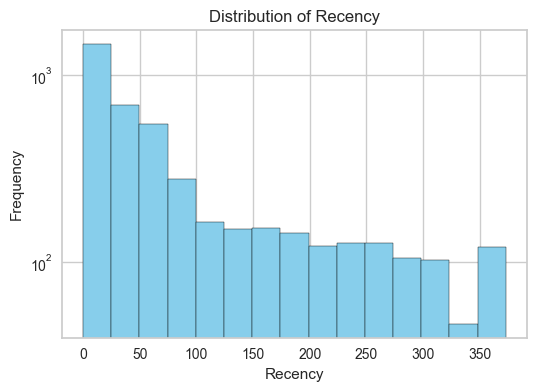

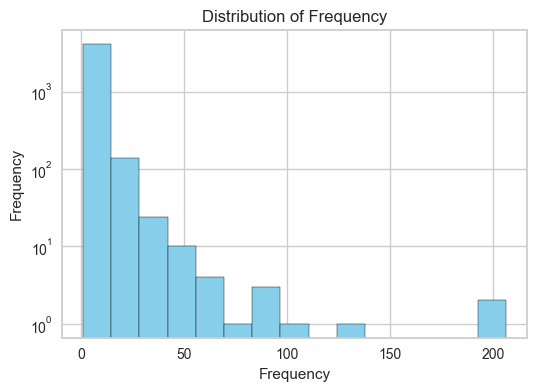

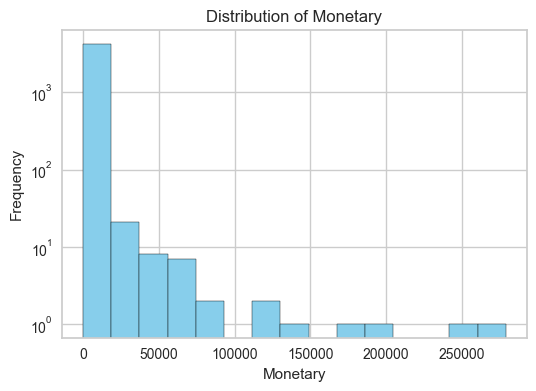

In [21]:

# Plotting distributions using a loop
for column in rfm.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(rfm[column], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.yscale('log')
    plt.grid(True)
    
    plt.savefig(f'./plots/Distribution of {column}.png')
    plt.show()

Nhận xét: Biểu đồ plot với trục tung theo scale logarithmic, do đó có thể thấy được các giá trị thấp nhất. Tất cả các biểu đồ đều right skewed
- Recency: Dữ liệu phân bố về bên trái. Phần lớn các điểm dữ liệu tập trung ở phía cuối thấp, cho thấy một phần lớn khách hàng mua hàng gần đây. Trong khoảng 2 tháng trở lại thì số lượng giao dịch chiếm phần lớn. Khách hàng mua hàng trong khoảng 1 tháng trở lại lên đến trên 1000 lần. Ngoài ra, từ 3 tháng đến gần 1 năm tần số giao dịch không quá 200 lần, chứng tỏ thời gian từ lần mua hàng gần đây nhất tương đối xa.
- Frequency: Tần số mua hàng dưới 50 lần chiếm phần lớn. Đa số khách hàng có xu hướng mua hàng khoảng dưới 10 lần 
- Monetary: Điều này cho thấy phần lớn khách hàng giá trị giao dịch trung bình thấp. Các giao dịch hàng hóa có giá trị cao đa số đều được thực hiện trên dưới 1 lần


In [22]:
# Calculate RFM quartiles

In [23]:
# Create labels for Recency, Frequency, Monetary
r_labels = range(4, 0, -1) # số ngày tính từ lần cuối mua hàng lớn thì gán nhãn nhỏ, ngược lại thì nhãn lớn 
f_labels = range(1, 5)
m_labels = range(1, 5)


In [24]:
[*r_labels]
[4, 3, 2, 1]

[4, 3, 2, 1]

In [25]:
#Set Recency Score
rfm['Recency_Score'] = pd.qcut(rfm['Recency'] ,5 , labels= [5,4,3,2,1])


In [26]:
#Set Frequency Score
rfm['Frequency_Score'] = pd.qcut(rfm['Frequency'].rank(method ='first') ,5 , labels= [1,2,3,4,5])

In [27]:
#Set Monatry Score
rfm['Monetary_Score'] = pd.qcut(rfm['Monetary'] ,5 , labels= [1,2,3,4,5])

In [28]:
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(int(x['Recency_Score'])) + str(int(x['Frequency_Score'])) + str(int(x['Monetary_Score']))

rfm['RFM_Score'] = rfm.apply(join_rfm, axis=1)

rfm.head()

Recency  Frequency  Monetary Recency_Score Frequency_Score  \
CustomerID                                                               
12346           325          1  77183.60             1               1   
12347             1          7   4310.00             5               5   
12348            74          4   1437.24             2               4   
12349            18          1   1457.55             4               1   
12350           309          1    294.40             1               1   

           Monetary_Score RFM_Score  
CustomerID                           
12346                   5       115  
12347                   5       555  
12348                   4       244  
12349                   4       414  
12350                   2       112

In [29]:
rfm_count_unique = rfm.groupby('RFM_Score')['RFM_Score'].nunique()

print(rfm_count_unique.sum())

118


Nhận xét: Có đến 118 segments -> quá lớn để có thể phân loại khách hàng. Do đó cần phải segment dựa trên phương pháp khác

In [30]:
#Defind Customer Segmentation
seg_map = {
    r'[1-2][1-2][1-5]': 'Inactive - Hibernating',
    r'[1-2][3-4][1-5]': 'Inactive - At Risk',
    r'[1-2]5[1-5]': 'Inactive - Critical',
    r'3[1-2][1-5]': 'Inactive - About to Churn',
    r'33[1-5]': 'Needs Attention',
    r'[3-4][4-5][1-5]': 'Active - Loyal Customers',
    r'[4-5][1-3][1-5]': 'Active - Promising',
    r'5[4-5][1-5]': 'Active - Champions',
}
rfm['Segment'] = rfm['RFM_Score'].replace(seg_map, regex=True)

- Inactive - Hibernating: Thuộc nhóm khách hàng không hoạt động, tức là họ đã không thực hiện giao dịch gần đây và đang nằm trong giai đoạn nghỉ ngơi hoặc không hoạt động đối với doanh nghiệp.
- Inactive - At Risk: Đây là nhóm khách hàng không hoạt động nhưng có nguy cơ, tức là họ đã không mua hàng gần đây và có nguy cơ chuyển sang nhóm khách hàng không còn quan tâm đến doanh nghiệp.
- Inactive - Critical: Nhóm này đề cập đến khách hàng không hoạt động nhưng với mức độ quan trọng cao, tức là họ đã không mua hàng gần đây và việc giữ chân họ đối với doanh nghiệp là cực kỳ quan trọng.
- Inactive - About to Churn: Đây là nhóm khách hàng không hoạt động và có nguy cơ rời bỏ doanh nghiệp, tức là họ đã không mua hàng gần đây và có khả năng chuyển sang nhóm khách hàng không quan tâm.
- Needs Attention: Nhóm này đề cập đến khách hàng cần được chú ý, tức là họ có thể không hoạt động đầy đủ hoặc đang có dấu hiệu chuyển đổi, và doanh nghiệp cần chú ý đến họ để giữ chân hoặc kích thích giao dịch. 
- Active - Loyal Customers: Nhóm khách hàng hoạt động và trung thành, tức là họ thường xuyên mua hàng từ doanh nghiệp và là những khách hàng mà doanh nghiệp nên giữ chân và xây dựng mối quan hệ lâu dài.
- Active - Promising: Nhóm khách hàng hoạt động với tiềm năng, tức là họ đã mua hàng gần đây và có tiềm năng phát triển, doanh nghiệp nên tập trung vào việc phát triển mối quan hệ với họ để tăng cường doanh số.
- Active - Champions: Đây là nhóm khách hàng hoạt động và rất quan trọng, tức là họ là những khách hàng trung thành, mua hàng thường xuyên và góp phần lớn vào doanh số của doanh nghiệp.

In [31]:
rfm

Recency  Frequency  Monetary Recency_Score Frequency_Score  \
CustomerID                                                               
12346           325          1  77183.60             1               1   
12347             1          7   4310.00             5               5   
12348            74          4   1437.24             2               4   
12349            18          1   1457.55             4               1   
12350           309          1    294.40             1               1   
...             ...        ...       ...           ...             ...   
18280           277          1    180.60             1               2   
18281           180          1     80.82             1               2   
18282             7          2    178.05             5               3   
18283             3         16   2039.58             5               5   
18287            42          3   1837.28             3               4   

           Monetary_Score RFM_Score                   Segment  
CustomerID                                                     
12346                   5       115    Inactive - Hibernating  
12347                   5       555        Active - Champions  
12348                   4       244        Inactive - At Risk  
12349                   4       414        Active - Promising  
12350                   2       112    Inactive - Hibernating  
...                   ...       ...                       ...  
18280                   1       121    Inactive - Hibernating  
18281                   1       121    Inactive - Hibernating  
18282                   1       531        Active - Promising  
18283                   5       555        Active - Champions  
18287                   4       344  Active - Loyal Customers  

[4334 rows x 8 columns]

In [32]:
rfm.Segment.value_counts()

Segment
Inactive - Hibernating       1068
Active - Loyal Customers      818
Active - Champions            643
Active - Promising            633
Inactive - At Risk            574
Inactive - About to Churn     347
Needs Attention               188
Inactive - Critical            63
Name: count, dtype: int64

In [33]:
rfm.shape

(4334, 8)

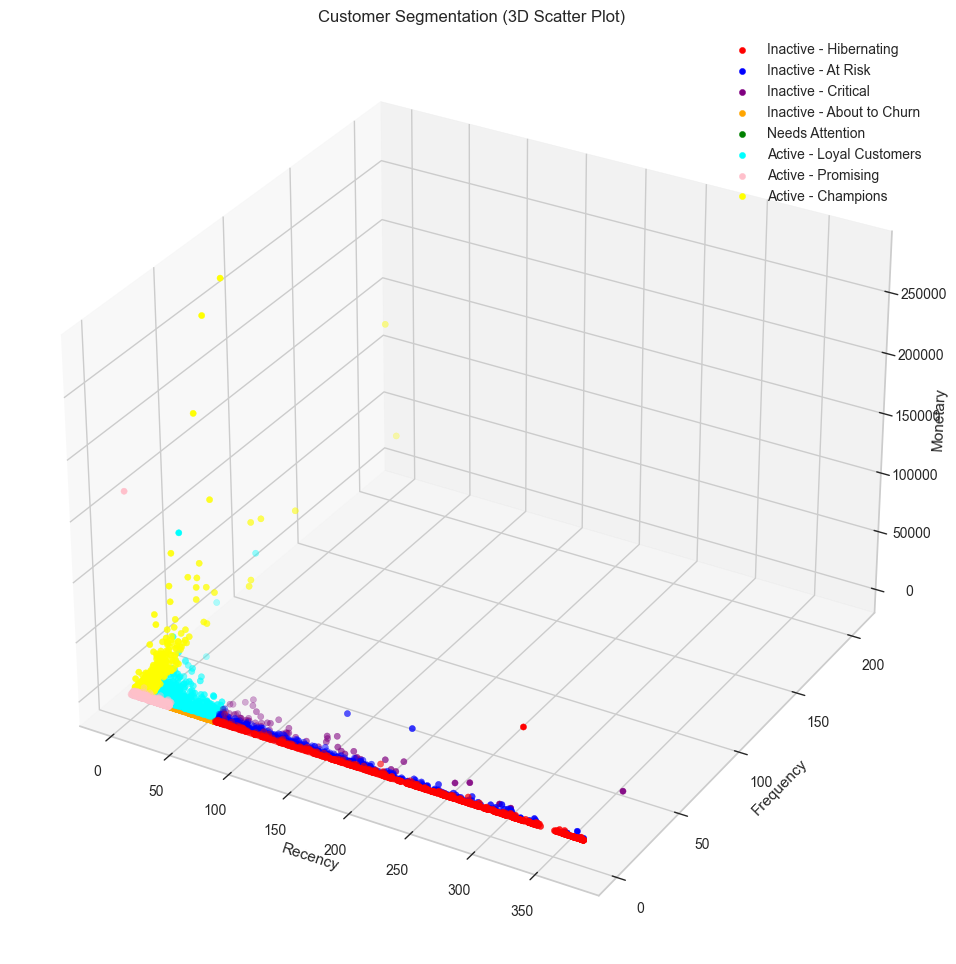

In [34]:
segment_colors = {
    'Inactive - Hibernating': 'red',
    'Inactive - At Risk': 'blue',
    'Inactive - Critical': 'purple',
    'Inactive - About to Churn': 'orange',
    'Needs Attention': 'green',
    'Active - Loyal Customers': 'cyan',
    'Active - Promising': 'pink',
    'Active - Champions': 'yellow',
}

# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Plot data points with segments as colors
for segment, color in segment_colors.items():
    segment_data = rfm[rfm['Segment'] == segment]
    ax.scatter(segment_data['Recency'], segment_data['Frequency'], segment_data['Monetary'], c=color, label=segment)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.title('Customer Segmentation (3D Scatter Plot)')

plt.savefig('./plots/RFM Clustering with 8 Clusters.png')
plt.show()

Nhận xét: với phương pháp RFM có thể xác định rõ ràng phân cụm data dựa vào đặc điểm Recency, Frequency	và Monetary

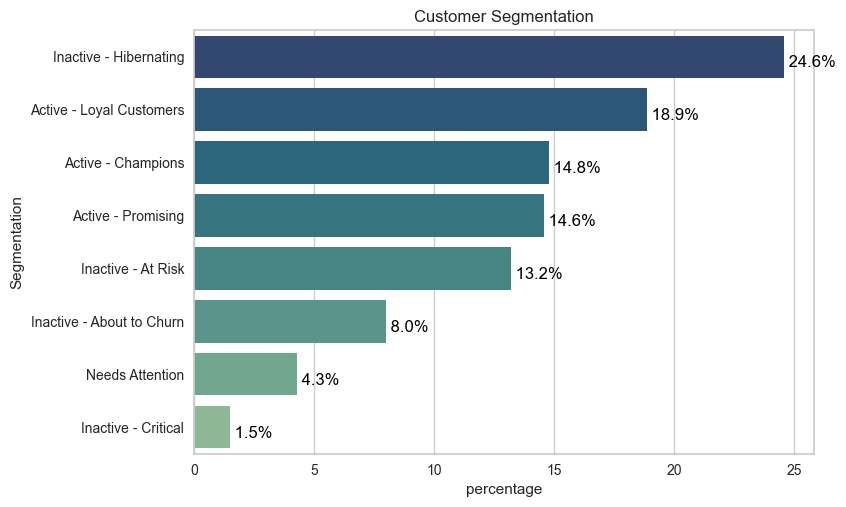

In [35]:
# Bar Plot for segments

Segments = (rfm['Segment'].value_counts(normalize=True) * 100).reset_index(name='percentage')
Segments = Segments.round(1)
b = sns.barplot(y='Segment', x='percentage', data=Segments, palette='crest_r')
for i, v in enumerate(Segments['percentage']):
    b.text(v, i + 0.20, " {:.1f}".format(v) + "%", color='black', ha="left")
    b.set_ylabel('Segmentation')
    b.set_title('Customer Segmentation')
plt.savefig('./plots/Customer Segmentation.png')

Nhận xét:
- 24.6% số khách hàng thuộc phân khúc "Hibernation", đây là những khách hàng đã mua hàng của chúng ta và lần cuối cùng mua cách đây một thời gian dài.

- 18.9% số khách hàng là những khách hàng trung thành và thường xuyên mua hàng từ chúng ta.

- 14.8% số khách hàng của chúng ta là những "Champions", tức là thị trường ưa thích của họ.

- 14.6% số khách hàng có tiềm năng tốt, đề cập đến những khách hàng đã mua hàng từ chúng ta gần đây và chưa mua nhiều lần.

- 13.2% số khách hàng thuộc phân khúc "At Risk", vì vậy chúng ta phải thu hút họ trở lại.

- 8.0% số khách hàng sắp "About to Churn", đây là phân khúc khách hàng đã mua hàng từ chúng ta trong một khoảng thời gian khá lâu.

- 4.3% số khách hàng của chúng ta cần được chú ý hơn để biến họ thành phân khúc "Champions".

- 1.6% số khách hàng của chúng ta không thể mất, và họ đã mua hàng từ chúng ta nhiều lần nhưng lần cuối cùng đã rất lâu rồi.

In [36]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg = rfm.groupby('Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg.columns = rfm_agg.columns.droplevel()
rfm_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
rfm_agg['Percent'] = round((rfm_agg['Count']/rfm_agg.Count.sum())*100, 2)

# Reset the index
rfm_agg = rfm_agg.reset_index()

rfm_agg


Segment  RecencyMean  FrequencyMean  MonetaryMean  Count  \
0         Active - Champions          5.0           12.0        6698.0    643   
1   Active - Loyal Customers         33.0            6.0        2780.0    818   
2         Active - Promising         16.0            2.0         868.0    633   
3  Inactive - About to Churn         53.0            1.0         459.0    347   
4         Inactive - At Risk        154.0            3.0        1065.0    574   
5        Inactive - Critical        134.0            8.0        2728.0     63   
6     Inactive - Hibernating        217.0            1.0         478.0   1068   
7            Needs Attention         52.0            2.0         819.0    188   

   Percent  
0    14.84  
1    18.87  
2    14.61  
3     8.01  
4    13.24  
5     1.45  
6    24.64  
7     4.34

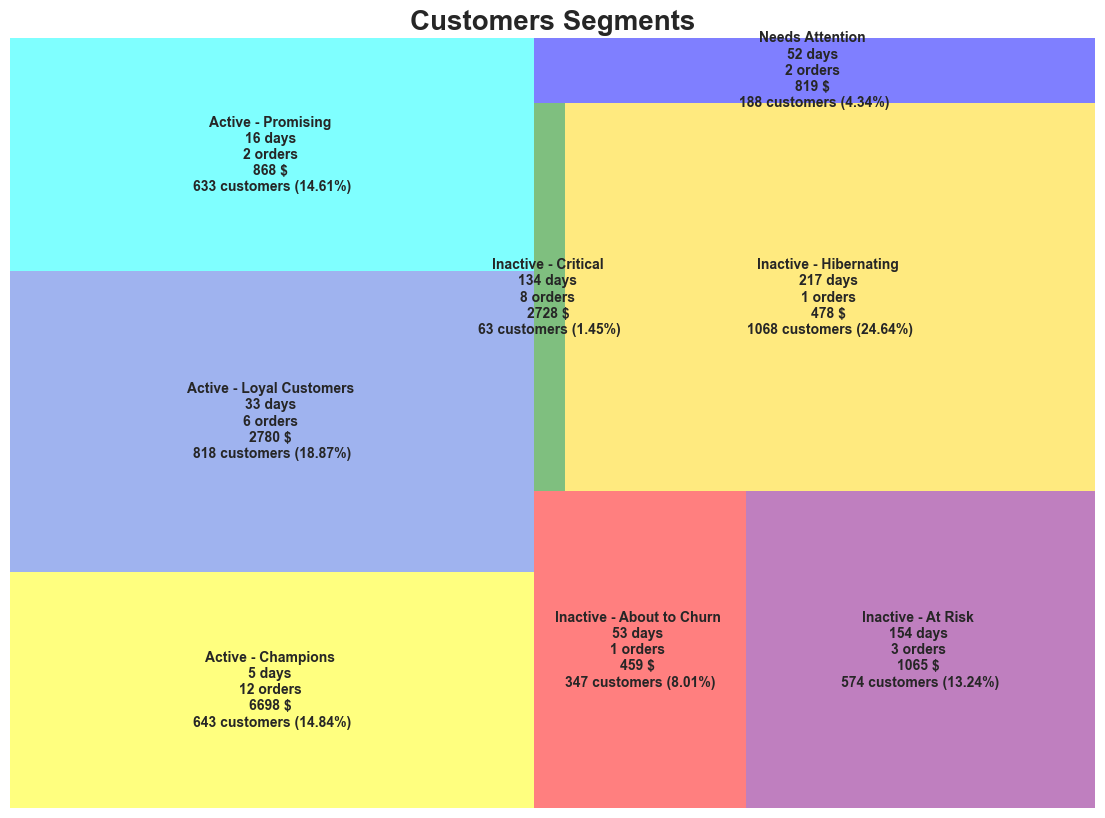

In [37]:

# Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict = {'Inactive - Hibernating':'yellow', 'Inactive - Critical':'royalblue', 'Inactive - About to Churn':'cyan',
               'Needs Attention':'red', 'Active - Loyal Customers':'purple', 'Active - Promising':'green', 'Active - Champions':'gold', 'Inactive - At Risk':'blue'}

squarify.plot(sizes=rfm_agg['Count'],
              text_kwargs={'fontsize':10,'weight':'bold','fontname':"sans serif"},
              color=colors_dict.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(*rfm_agg.iloc[i])
                     for i in range(0, len(rfm_agg))], alpha=0.5 )

plt.title("Customers Segments", fontsize=20, fontweight="bold")
plt.axis('off')

plt.savefig('./plots/Customer Segmentation Square.png')
plt.show()

Nhận xét:
- Từ biểu đồ squarify có thể dễ dàng thấy được rằng số lượng Cutomer thuộc nhóm Inactive - Critical chiếm ít nhất ( 1.45%) chỉ có 63 khách hàng, trong khí đó lượng khách hàng Hibernating chiếm lớn nhất (26.64%) tương ứng với 1068 khách hàng. 
- Đối với những nhóm khách hàng còn lại chia đều về mặt số lượng khách hàng theo từng nhóm, trong đó số lượng loyal + promising + champions cộng lại lớn hơn nhiều so với churn + at risk, chứng tỏ công ty kinh doanh tốt, có xu hướng thu hút khách hàng và có thể phát triển trong tương lai

In [38]:
fig = px.scatter(rfm_agg, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Segment",
                 hover_name="Segment", size_max=50)
fig.show()

Nhận xét: các cluster gần như tách biệt nhau, có 1 vài cluster như "Need Attention" và "Inactive - About to Churn" bị chồng lấp lên nhau

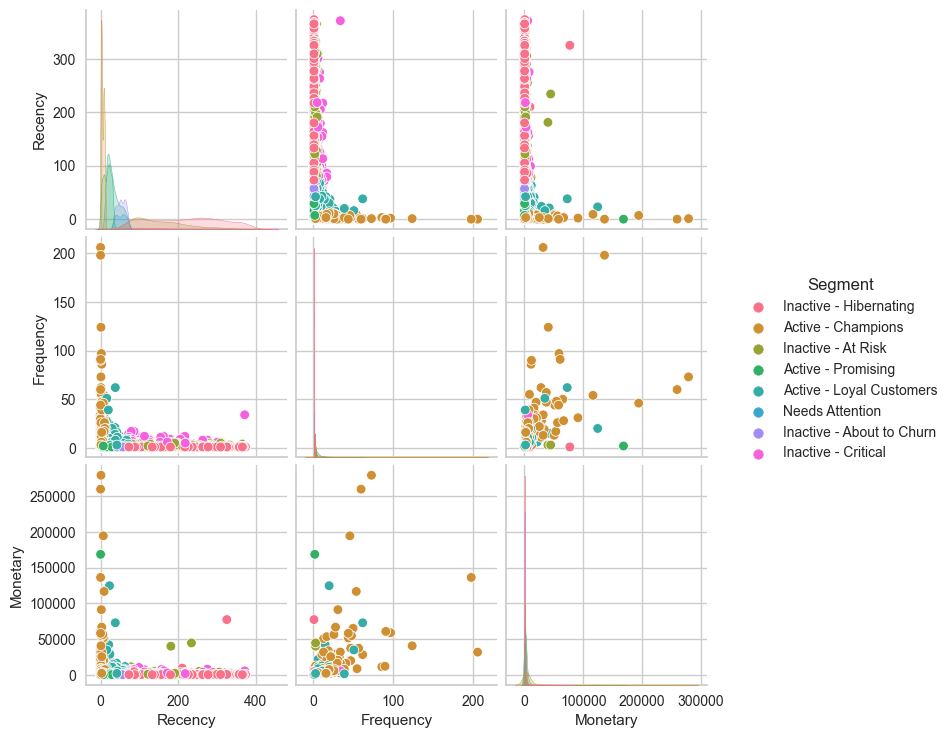

In [39]:
sns.pairplot(rfm[['Recency','Frequency','Monetary','Segment']], hue="Segment")

plt.savefig('./plots/Pairplot of RFM Analyst.png')
plt.show()

Dựa vào các nhóm biểu đồ pair plot có thể thấy được các cluster trên thực tế gần như không chồng lấp lên nhau vì đã được filter theo điều kiện
- Mối quan hệ Frequency và Monetary: Các điểm dữ liệu có mức độ phân tán cao hơn, có nhiều điểm outliers
- Tuy nhiên đối với mối quan hệ Monetary và Recency, các điểm dữ liệu phân nhóm dựa vào yếu tố Monetary là chính, còn Recency gần như rải rác từ 0-400

# RFM + KMeans

In [40]:
df_kmeans = rfm[['Recency','Frequency','Monetary']]
df_kmeans

Recency  Frequency  Monetary
CustomerID                              
12346           325          1  77183.60
12347             1          7   4310.00
12348            74          4   1437.24
12349            18          1   1457.55
12350           309          1    294.40
...             ...        ...       ...
18280           277          1    180.60
18281           180          1     80.82
18282             7          2    178.05
18283             3         16   2039.58
18287            42          3   1837.28

[4334 rows x 3 columns]

In [41]:
# Sử dụng Cuberoot để biến đổi dữ liệu về dạng phân phối chuẩn
rfm_Kmeans_cr = pd.DataFrame()


rfm_Kmeans_cr['Recency'] = pd.Series(np.cbrt(rfm['Recency'])).values
rfm_Kmeans_cr['Frequency'] = pd.Series(np.cbrt(rfm['Frequency'])).values
rfm_Kmeans_cr['Monetary'] = pd.Series(np.cbrt(rfm['Monetary'])).values


rfm_Kmeans_cr


Recency  Frequency   Monetary
0     6.875344   1.000000  42.576995
1     1.000000   1.912931  16.273929
2     4.198336   1.587401  11.285213
3     2.620741   1.000000  11.338123
4     6.760614   1.000000   6.652414
...        ...        ...        ...
4329  6.518684   1.000000   5.652483
4330  5.646216   1.000000   4.323541
4331  1.912931   1.259921   5.625753
4332  1.442250   2.519842  12.681781
4333  3.476027   1.442250  12.247810

[4334 rows x 3 columns]

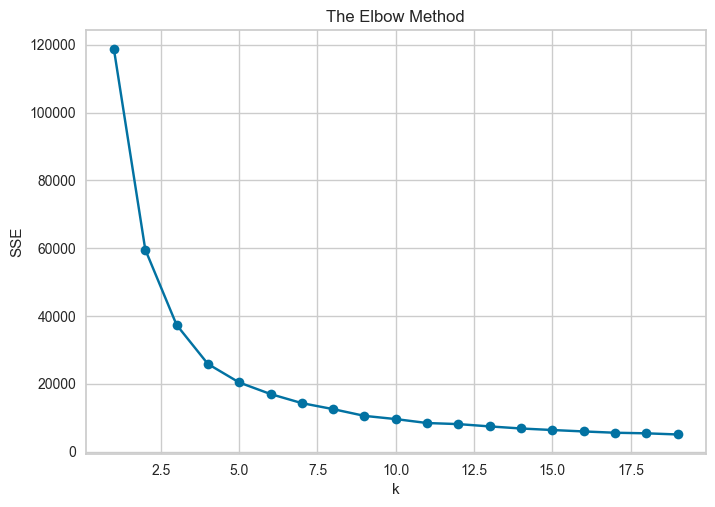

In [42]:
# Elbow method
sse = {}
for k in range(1, 20):
    kmeans_Elbow = KMeans(n_clusters=k, random_state=42)
    kmeans_Elbow.fit(rfm_Kmeans_cr)
    sse[k] = kmeans_Elbow.inertia_ # SSE to closest cluster centroid

plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')

plt.plot(list(sse.keys()), list(sse.values()), marker='o')

plt.savefig('./plots/Elbow method.png')
plt.show()

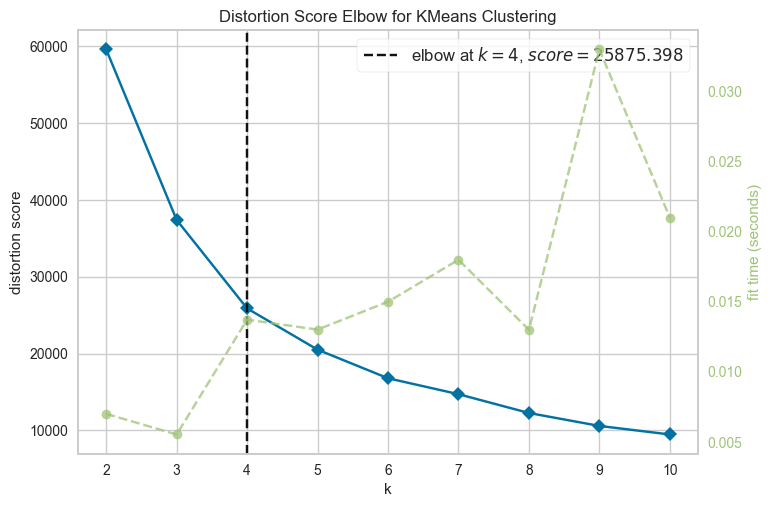

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
elbow_method = KElbowVisualizer(KMeans(), k = 10)
elbow_method.fit(rfm_Kmeans_cr)

plt.savefig('./plots/Distortion Score Elbow for Kmeans Clustering.png')
elbow_method.show()

Nhận xét: Tại vị trí Elbow k=5 đạt giá trị score cao nhất

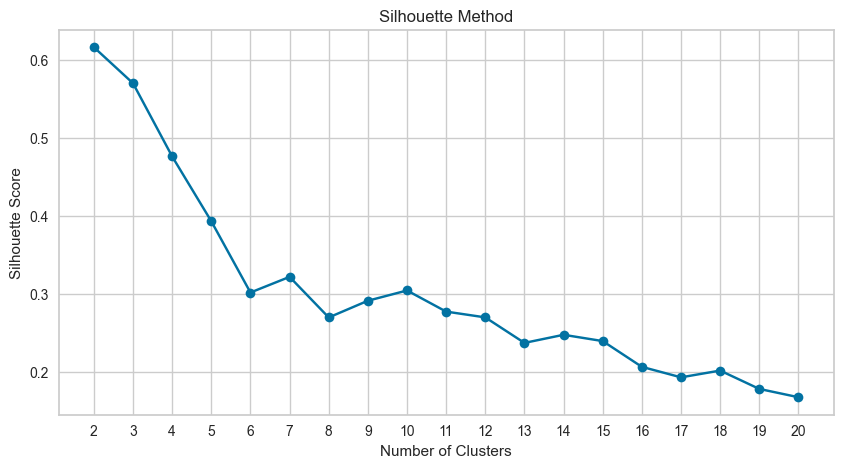

In [44]:
# Sihouette method
silhouette_scores = []

for k in range(2, 21):  # silhouette_score requires at least 2 clusters
    kmeans_Sihouette = KMeans(n_clusters=k, random_state=42)
    kmeans_Sihouette.fit(rfm_Kmeans_cr)
    labels = kmeans_Sihouette.labels_
    silhouette_avg = silhouette_score(df_kmeans, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 5))
plt.plot(range(2, 21), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
# plt.grid(True)

plt.savefig('./plots/Silhouette Method.png')
plt.show()

For n_clusters = 2, the average silhouette_score is 0.55
For n_clusters = 3, the average silhouette_score is 0.50
For n_clusters = 4, the average silhouette_score is 0.42
For n_clusters = 5, the average silhouette_score is 0.37
For n_clusters = 6, the average silhouette_score is 0.37
For n_clusters = 7, the average silhouette_score is 0.37
For n_clusters = 8, the average silhouette_score is 0.36


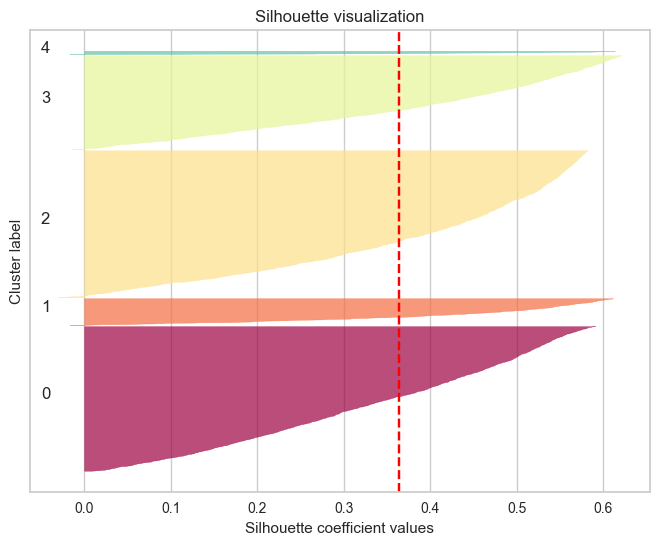

In [45]:
# Convert data to a numpy array
X = np.array(list(zip(rfm_Kmeans_cr['Recency'], rfm_Kmeans_cr['Frequency'], rfm_Kmeans_cr['Monetary'])))

# Apply silhouette analysis to determine optimal number of clusters
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for n_clusters in range_n_clusters:
    # Initialize KMeans with n_clusters
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the average silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is {silhouette_avg:.2f}")

# Choose the optimal number of clusters and plot silhouette visualization
best_n_clusters = 5  # Choose the optimal number of clusters

# Initialize KMeans with the optimal number of clusters
best_clusterer = KMeans(n_clusters=best_n_clusters, random_state=42)
best_cluster_labels = best_clusterer.fit_predict(X)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X, best_cluster_labels)

# Plotting the silhouette visualization
plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(best_n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i
    ith_cluster_silhouette_values = sample_silhouette_values[best_cluster_labels == i]

    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.get_cmap("Spectral")(float(i) / best_n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with cluster numbers
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10

plt.title("Silhouette visualization")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")

plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear y-axis ticks

plt.savefig('./plots/Silhouette visualization.png')
plt.show()

Nhận xét: Từ biểu đồ có thể thấy được giá trị n_clusters = 5 cho ra kết quả tốt hơn, vì có thể phân cụm cả những cụm số lượng lớn, trung và thấp

In [46]:
# Lựa chọn giá trị cluster cho Kmeans là 5


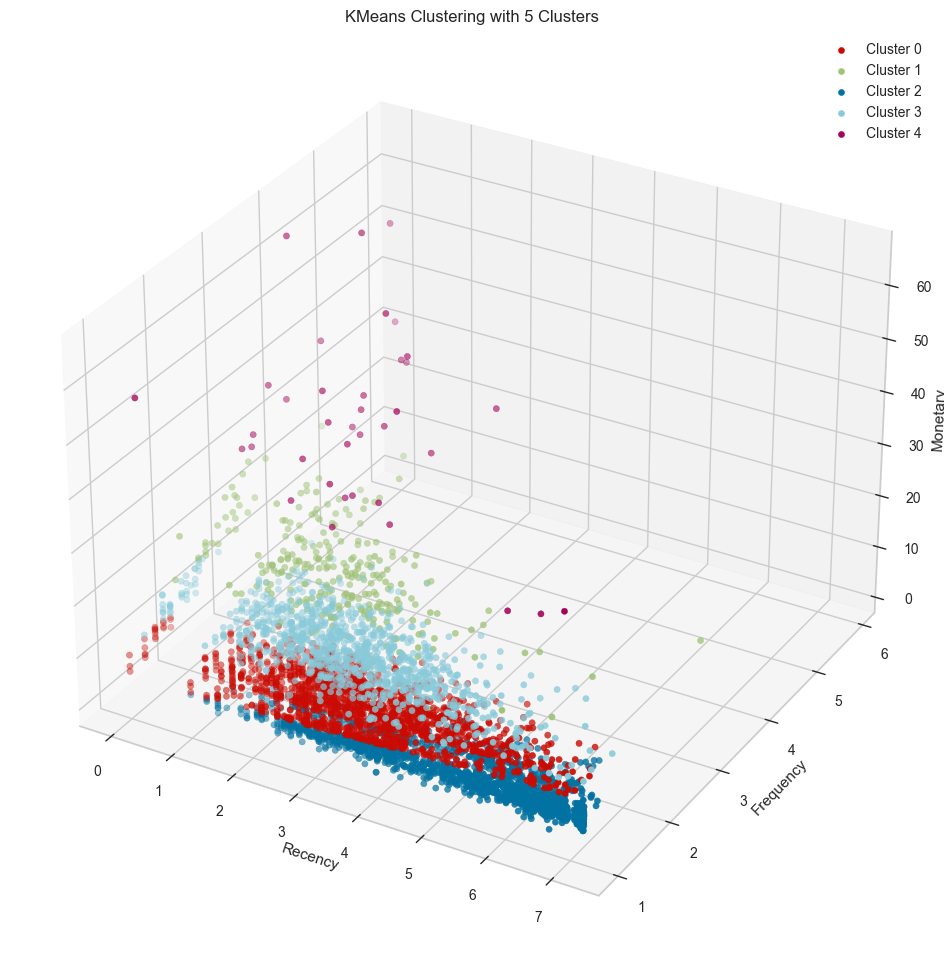

In [47]:
rfm_Kmeans_cluster = rfm_Kmeans_cr.copy()
kmeans = KMeans(n_clusters=5, random_state=42)
rfm_Kmeans_cluster['cluster'] = kmeans.fit_predict(rfm_Kmeans_cluster[['Recency', 'Frequency', 'Monetary']])

# Plotting
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c','m']
marker = 'o'

# Plot data points with clusters
for i in range(5):
    clustered_df = rfm_Kmeans_cluster[rfm_Kmeans_cluster['cluster'] == i]
    ax.scatter(clustered_df['Recency'], clustered_df['Frequency'], clustered_df['Monetary'], c=colors[i], marker=marker, label=f'Cluster {i}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.title('KMeans Clustering with 5 Clusters')

plt.savefig('./plots/KMeans Clustering with 5 Clusters.png')
plt.show()

Nhận xét:
- Các cluster tập trung lại lẫn nhau dẫn đến việc khó phân chia theo đặc điểm Recency, tuy nhiên có thể dễ dàng phân chia theo Frequency và Monetary
- Nhờ vào việc chia cluster = 5 ta có thể thấy được đặc điểm của cluster có số lượng nhỏ nhất: cluster 4 các điểm dữ liệu phân tán trên khoảng frequency cao, monetary cao và recency thấp => tương ứng với nhóm các khách hàng tiềm năng nhất mà doanh nghiệp cần phải target vào

In [48]:
model = KMeans(n_clusters=5, random_state=42)
model.fit(rfm_Kmeans_cr)
rfm_Kmeans_cr["Cluster"] = model.labels_
rfm_Kmeans_cr.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(2)


Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          3.45      1.35     8.95  1506
1          2.12      2.39    19.58   281
2          5.17      1.08     6.05  1530
3          2.92      1.78    13.15   980
4          1.71      3.27    39.31    37

In [49]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2 = rfm_Kmeans_cr.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2.columns = rfm_agg2.columns.droplevel()
rfm_agg2.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
rfm_agg2['Percent'] = round((rfm_agg2['Count']/rfm_agg2.Count.sum())*100, 2)

# Reset the index
rfm_agg2 = rfm_agg2.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2['Cluster'] = 'Cluster' + rfm_agg2['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster0          3.0            1.0           9.0   1506    34.75
1  Cluster1          2.0            2.0          20.0    281     6.48
2  Cluster2          5.0            1.0           6.0   1530    35.30
3  Cluster3          3.0            2.0          13.0    980    22.61
4  Cluster4          2.0            3.0          39.0     37     0.85

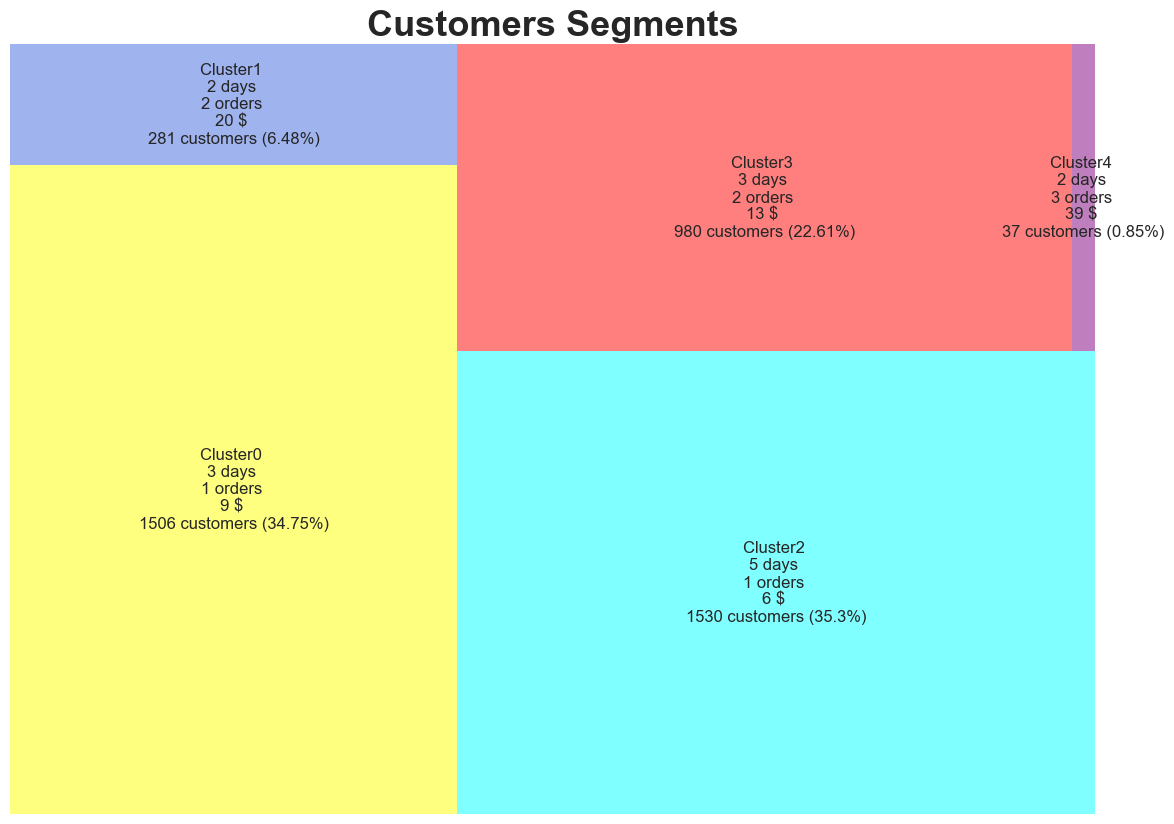

In [50]:
# Create plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan', 
                'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2['Count'], 
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(rfm_agg2['Cluster'].iloc[i],
                                                                         rfm_agg2['RecencyMean'].iloc[i],
                                                                         rfm_agg2['FrequencyMean'].iloc[i],
                                                                         rfm_agg2['MonetaryMean'].iloc[i],
                                                                         rfm_agg2['Count'].iloc[i],
                                                                         rfm_agg2['Percent'].iloc[i]) for i in range(len(rfm_agg2))],
              alpha=0.5)

plt.title("Customers Segments", fontsize=26, fontweight="bold")
plt.axis('off')

plt.savefig('./plots/Customers Segments Kmeans.png')
plt.show()

Nhận xét:
- Từ biểu đồ squarify có thể dễ dàng nhận thấy được khách hàng thuộc các cluster như cluster 1, cluster 3 và cluster 4 thuộc nhóm các khách hàng tiềm năng, dựa trên các đặc điểm R, M và F
- Nhóm khách hàng thuộc các cluster 0 và 2 thì ngược lại, với tổng số lượng khách hàng nhiều hơn 1 nửa. Điều này đúng với đa số thị trường các doanh nghiệp hiện nay khi số lượng các khách hàng tiềm năng và các khách hàng mua-1-lần luôn có sự chênh lệch nhau

In [51]:
fig = px.scatter(rfm_agg2, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
                 hover_name="Cluster", size_max=50)

fig.show()


# RFM + Hierarchy

In [52]:
df_hierarchy = rfm[['Recency','Frequency','Monetary']]
df_hierarchy

Recency  Frequency  Monetary
CustomerID                              
12346           325          1  77183.60
12347             1          7   4310.00
12348            74          4   1437.24
12349            18          1   1457.55
12350           309          1    294.40
...             ...        ...       ...
18280           277          1    180.60
18281           180          1     80.82
18282             7          2    178.05
18283             3         16   2039.58
18287            42          3   1837.28

[4334 rows x 3 columns]

In [53]:
# Sử dụng Cuberoot để biến đổi dữ liệu về dạng phân phối chuẩn
rfm_hierarchy_cr = pd.DataFrame()


rfm_hierarchy_cr['Recency'] = pd.Series(np.cbrt(rfm['Recency'])).values
rfm_hierarchy_cr['Frequency'] = pd.Series(np.cbrt(rfm['Frequency'])).values
rfm_hierarchy_cr['Monetary'] = pd.Series(np.cbrt(rfm['Monetary'])).values


rfm_hierarchy_cr

Recency  Frequency   Monetary
0     6.875344   1.000000  42.576995
1     1.000000   1.912931  16.273929
2     4.198336   1.587401  11.285213
3     2.620741   1.000000  11.338123
4     6.760614   1.000000   6.652414
...        ...        ...        ...
4329  6.518684   1.000000   5.652483
4330  5.646216   1.000000   4.323541
4331  1.912931   1.259921   5.625753
4332  1.442250   2.519842  12.681781
4333  3.476027   1.442250  12.247810

[4334 rows x 3 columns]

In [54]:
# Scale dữ liệu 
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df_hierarchy_scaled = robust_scaler.fit_transform(rfm_hierarchy_cr)

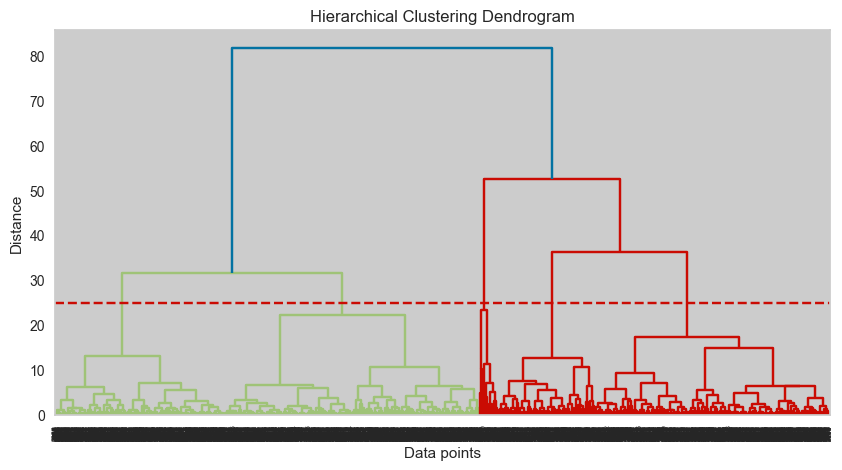

In [55]:
# Hierachy sử dụng thư viện spicy
linkage_matrix = hierarchy.linkage(df_hierarchy_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
hierarchy.dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.axhline(y=25, color='r', linestyle='--')

plt.savefig('./plots/Customer Dendograms.png')
plt.show()

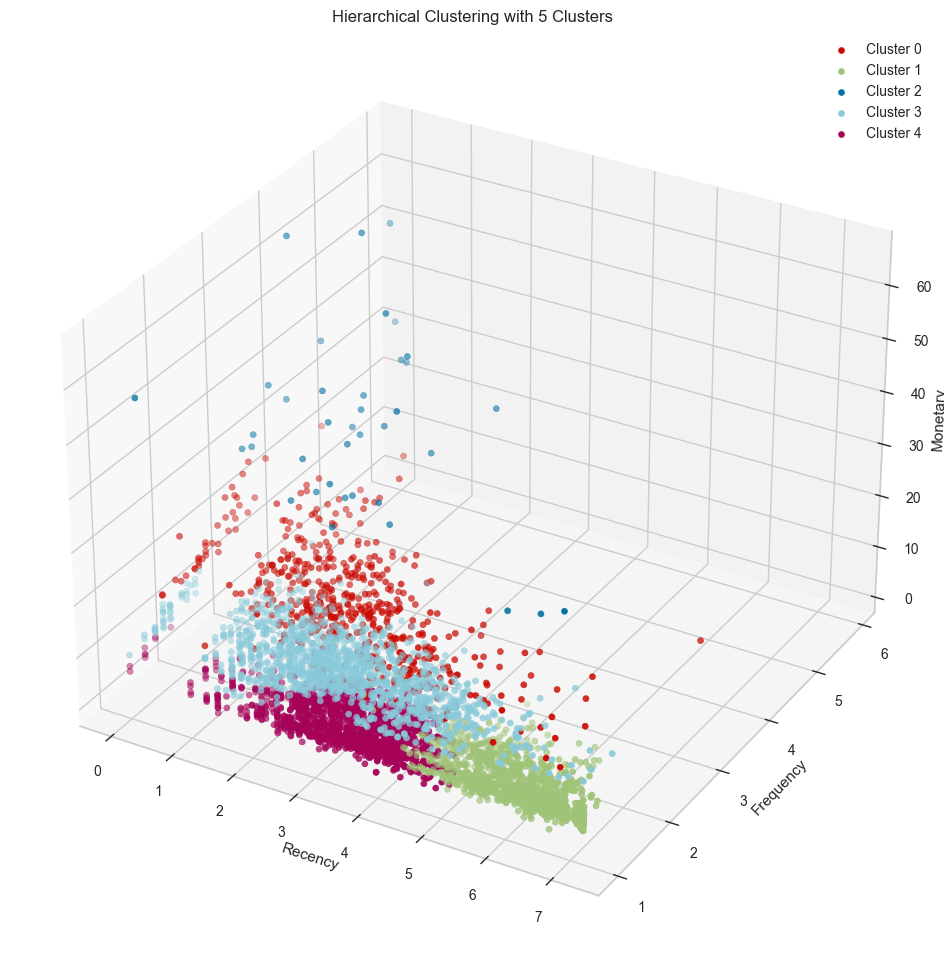

In [56]:
# Hierarchical clustering with 5 clusters
agg_cluster = AgglomerativeClustering(n_clusters=5)
rfm_hierarchy_cr['cluster'] = agg_cluster.fit_predict(rfm_hierarchy_cr[['Recency', 'Frequency', 'Monetary']])

# Plotting
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c', 'm']
marker = 'o'

# Plot data points with clusters
for i in range(5):
    clustered_df = rfm_hierarchy_cr[rfm_hierarchy_cr['cluster'] == i]
    ax.scatter(clustered_df['Recency'], clustered_df['Frequency'], clustered_df['Monetary'], c=colors[i], marker=marker, label=f'Cluster {i}')

    
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.legend()
plt.title('Hierarchical Clustering with 5 Clusters')

plt.savefig('./plots/Hierarchical Clustering with 5 Clusters.png')
plt.show()

Nhận xét: 
- Từ biểu đồ 3D phân bố các Clustering, có thể dễ dàng nhận thấy thấy rằng các cluster phân bố chồng chất lên nhau nên việc cluster các cụm khá khó khăn
- Tuy nhiên nếu như kết hợp với biểu đồ dendrogram thì có thể dễ dàng nhận thấy được các cluster chia rõ theo từng đặc điểm của recency, frequency và Monetary. Ví dụ cluster 4 chỉ cho phép phạm vi Recency trong khoảng 0-5, để so sánh với cluster 1

In [57]:
# Lựa chọn giá trị cluster = 5 cho hierarchy

In [58]:
rfm_hierarchy_cr["Cluster"] = agg_cluster.labels_
rfm_hierarchy_cr.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0          2.56      2.15    17.45   535
1          6.06      1.12     6.78  1169
2          1.70      3.26    39.05    38
3          2.90      1.63    11.34  1300
4          3.35      1.17     7.03  1292

In [59]:
# Calculate average values for each RFM_Level, and return a size of each segment
rfm_agg2_hierarchy = rfm_hierarchy_cr.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']}).round(0)

rfm_agg2_hierarchy.columns = rfm_agg2_hierarchy.columns.droplevel()
rfm_agg2_hierarchy.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count']
rfm_agg2_hierarchy['Percent'] = round((rfm_agg2_hierarchy['Count']/rfm_agg2_hierarchy.Count.sum())*100, 2)

# Reset the index
rfm_agg2_hierarchy = rfm_agg2_hierarchy.reset_index()

# Change thr Cluster Columns Datatype into discrete values
rfm_agg2_hierarchy['Cluster'] = 'Cluster' + rfm_agg2_hierarchy['Cluster'].astype('str')

# Print the aggregated dataset
rfm_agg2_hierarchy

Cluster  RecencyMean  FrequencyMean  MonetaryMean  Count  Percent
0  Cluster0          3.0            2.0          17.0    535    12.34
1  Cluster1          6.0            1.0           7.0   1169    26.97
2  Cluster2          2.0            3.0          39.0     38     0.88
3  Cluster3          3.0            2.0          11.0   1300    30.00
4  Cluster4          3.0            1.0           7.0   1292    29.81

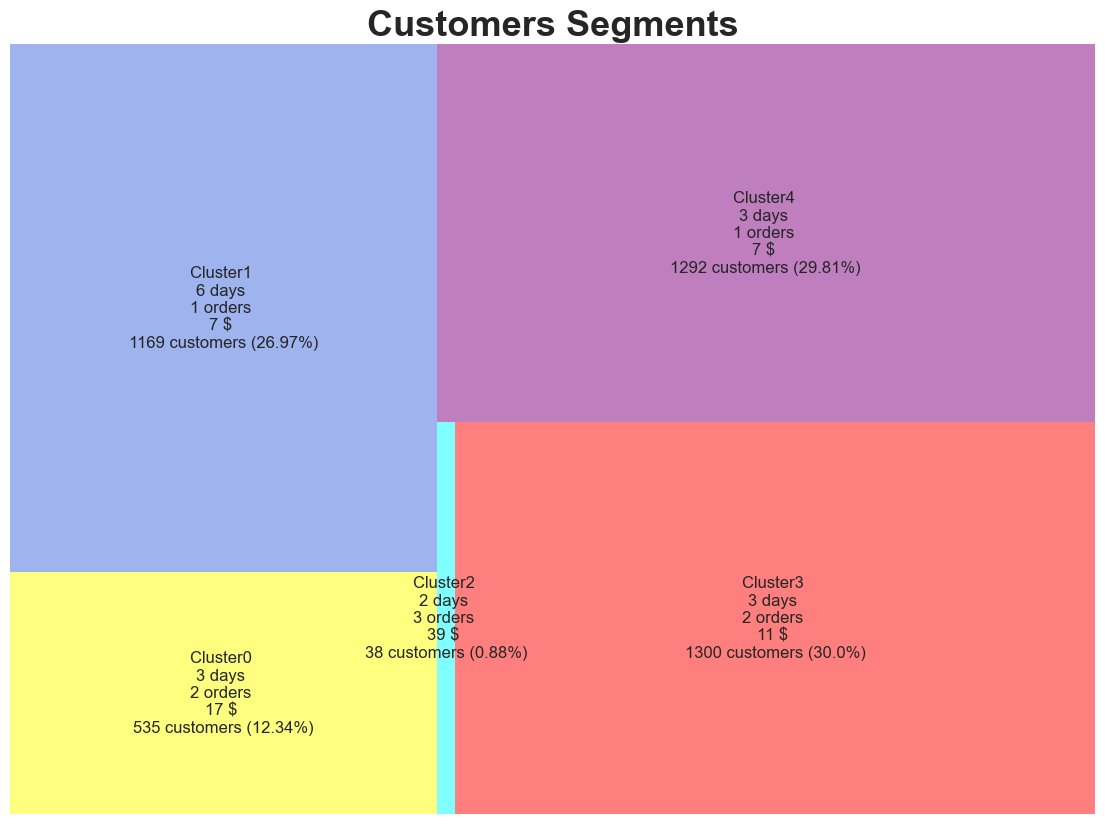

In [60]:
# Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(14, 10)

colors_dict2 = {'Cluster0':'yellow','Cluster1':'royalblue', 'Cluster2':'cyan', 
                'Cluster3':'red', 'Cluster4':'purple', 'Cluster5':'green', 'Cluster6':'gold'}

squarify.plot(sizes=rfm_agg2_hierarchy['Count'], 
              color=colors_dict2.values(),
              label=['{} \n{:.0f} days \n{:.0f} orders \n{:.0f} $ \n{:.0f} customers ({}%)'.format(rfm_agg2_hierarchy['Cluster'].iloc[i],
                                                                         rfm_agg2_hierarchy['RecencyMean'].iloc[i],
                                                                         rfm_agg2_hierarchy['FrequencyMean'].iloc[i],
                                                                         rfm_agg2_hierarchy['MonetaryMean'].iloc[i],
                                                                         rfm_agg2_hierarchy['Count'].iloc[i],
                                                                         rfm_agg2_hierarchy['Percent'].iloc[i]) for i in range(len(rfm_agg2_hierarchy))],
              alpha=0.5)

plt.title("Customers Segments", fontsize=26, fontweight="bold")
plt.axis('off')

plt.savefig('./plots/Customers Segments Hierarchy.png')
plt.show()

Nhận xét: Cách phân chia hierarchy tương tự như Kmeans: Clusters là nhóm khách hàng rất quan trọng và thường chiếm tỉ lệ rất thấp (dưới 1%). 

In [61]:
fig = px.scatter(rfm_agg2_hierarchy, x="RecencyMean", y="MonetaryMean", size="FrequencyMean", color="Cluster",
                 hover_name="Cluster", size_max=50)

fig.show()

Theo cách hierarchy thì có đến 3 trong tổng số các cluster bị chồng lấp lên nhau, do vậy khó xác định được vị trí của khách hàng thuộc 1 trong 3 nhóm này

# RFM + KMeans (Spark)

In [62]:
import findspark
findspark.init()
import pyspark
from pyspark import SparkContext
sc =SparkContext(master="local", appName="New Spark Context")
from pyspark.sql import SparkSession
spark = SparkSession(sc)
from pyspark.sql.functions import *

In [63]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [64]:
# Convert Pandas DataFrame to Spark DataFrame
rfm_spark = spark.createDataFrame(rfm_Kmeans_cr[[ "Recency", "Frequency", "Monetary"]].reset_index())

rfm_spark.show()

+-----+------------------+------------------+------------------+
|index|           Recency|         Frequency|          Monetary|
+-----+------------------+------------------+------------------+
|    0|6.8753443353707056|               1.0|42.576995374738374|
|    1|               1.0|1.9129311827723892|16.273929242290336|
|    2| 4.198336453808407|1.5874010519681994|11.285213122769338|
|    3|2.6207413942088964|               1.0|11.338122735448644|
|    4|  6.76061430174869|               1.0| 6.652413995363064|
|    5|3.2710663101885897|1.9129311827723892|11.148777574498276|
|    6|  5.87713065921074|               1.0| 4.464745095584538|
|    7| 6.135792439661959|               1.0| 10.25795535483056|
|    8|   5.9720926198264|               1.0| 7.716084889647306|
|    9|2.8020393306553872|1.4422495703074083|13.549303032827371|
|   10|3.1748021039363987|               1.0|18.378477907710938|
|   11|               1.0| 1.259921049894873| 9.754208133088744|
|   12| 3.848501131276805

In [65]:
# Prepare the features for clustering using VectorAssembler
feature_columns = ['Recency', 'Frequency', 'Monetary']
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')
rfm_spark = assembler.transform(rfm_spark)

With k =2- Silhouette = 0.7051263953243294
With k =3- Silhouette = 0.6890231126478114
With k =4- Silhouette = 0.6063119681329336
With k =5- Silhouette = 0.5362541067882851
With k =6- Silhouette = 0.5423183866529041
With k =7- Silhouette = 0.5331982815820502
With k =8- Silhouette = 0.5353490001764787
With k =9- Silhouette = 0.5351767314166297
With k =10- Silhouette = 0.5094872731975982



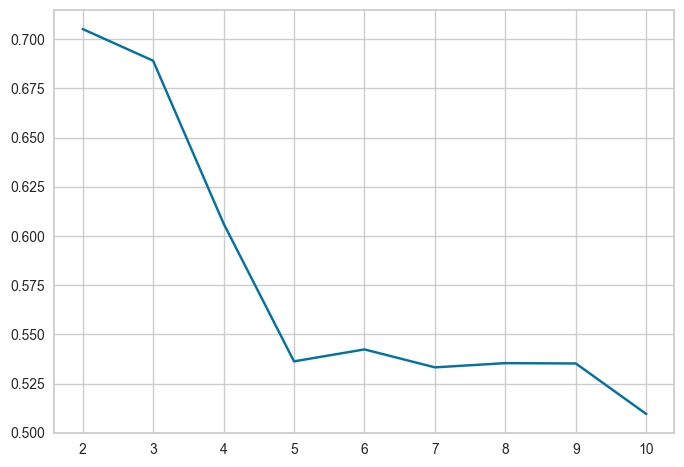

In [66]:
# Trains a k-means model.
k_list = []
silhouette_list = []
sil_str = ""


for k in range(2,11):
    kmeans = KMeans(featuresCol='features',k=k)
    model_spark = kmeans.fit(rfm_spark)
    k_list.append(k)

    # silhoutte
    predictions = model_spark.transform(rfm_spark)

    # Evaluate clustering by computing Silhouette score
    evaluator = ClusteringEvaluator()
    silhouette = evaluator.evaluate(predictions)
    silhouette_list.append(silhouette)

    sil_str = sil_str + "With k =" + str(k) + "- Silhouette = " + str(silhouette) + "\n"
    
print(sil_str)
plt.plot(k_list, silhouette_list)

plt.savefig(f'./plots/Spark KMeans Sihouette.png')
plt.show()

Nhận xét: Dựa vào đồ thị có thể thấy chọn được giá trị số lượng cluster là 4 hoặc 6 hoặc 7. Do đó cần phải khảo sát thêm biểu đồ 3D plot và squarify tương ứng để xem dữ liệu chia có bị bias hay không

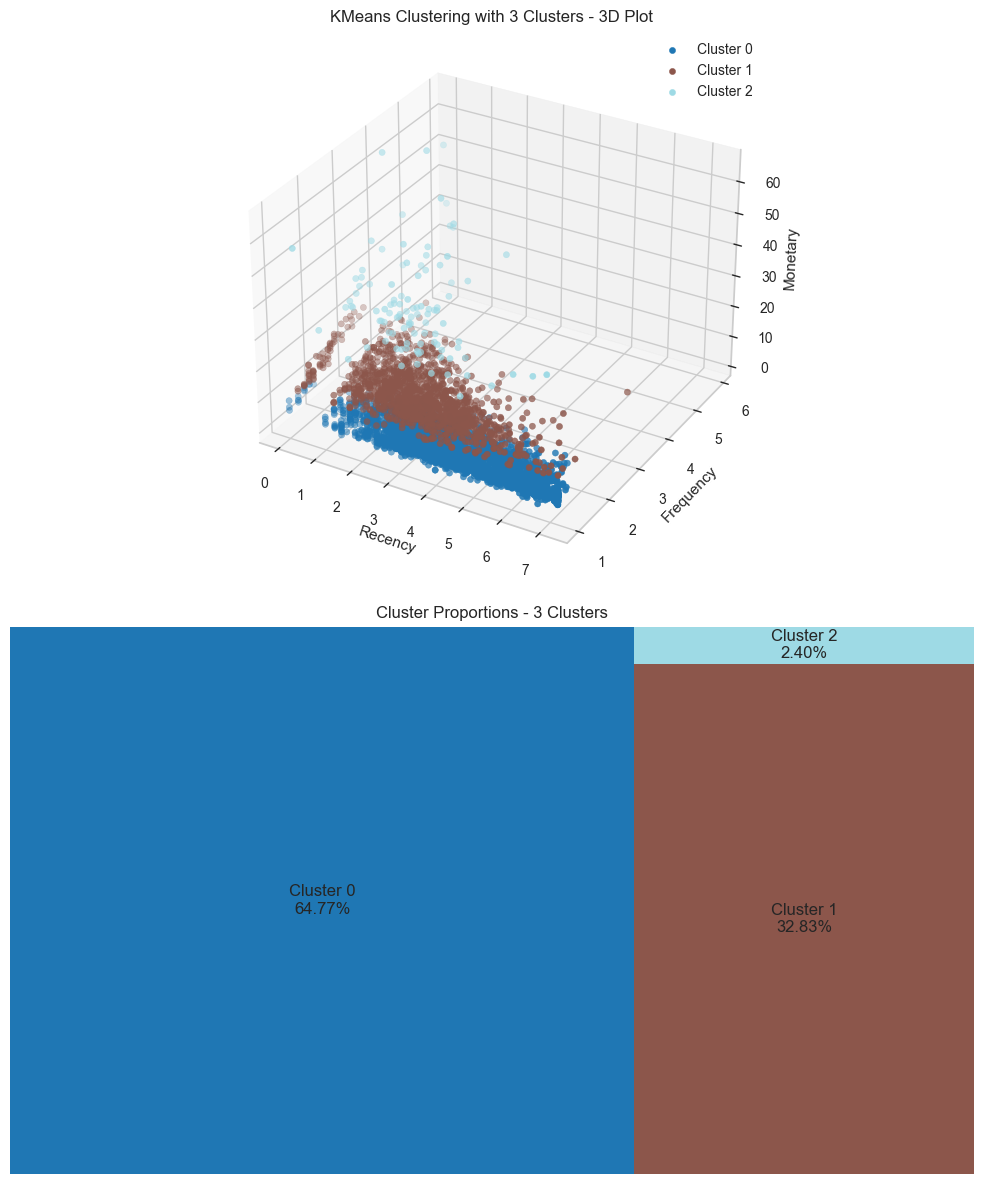

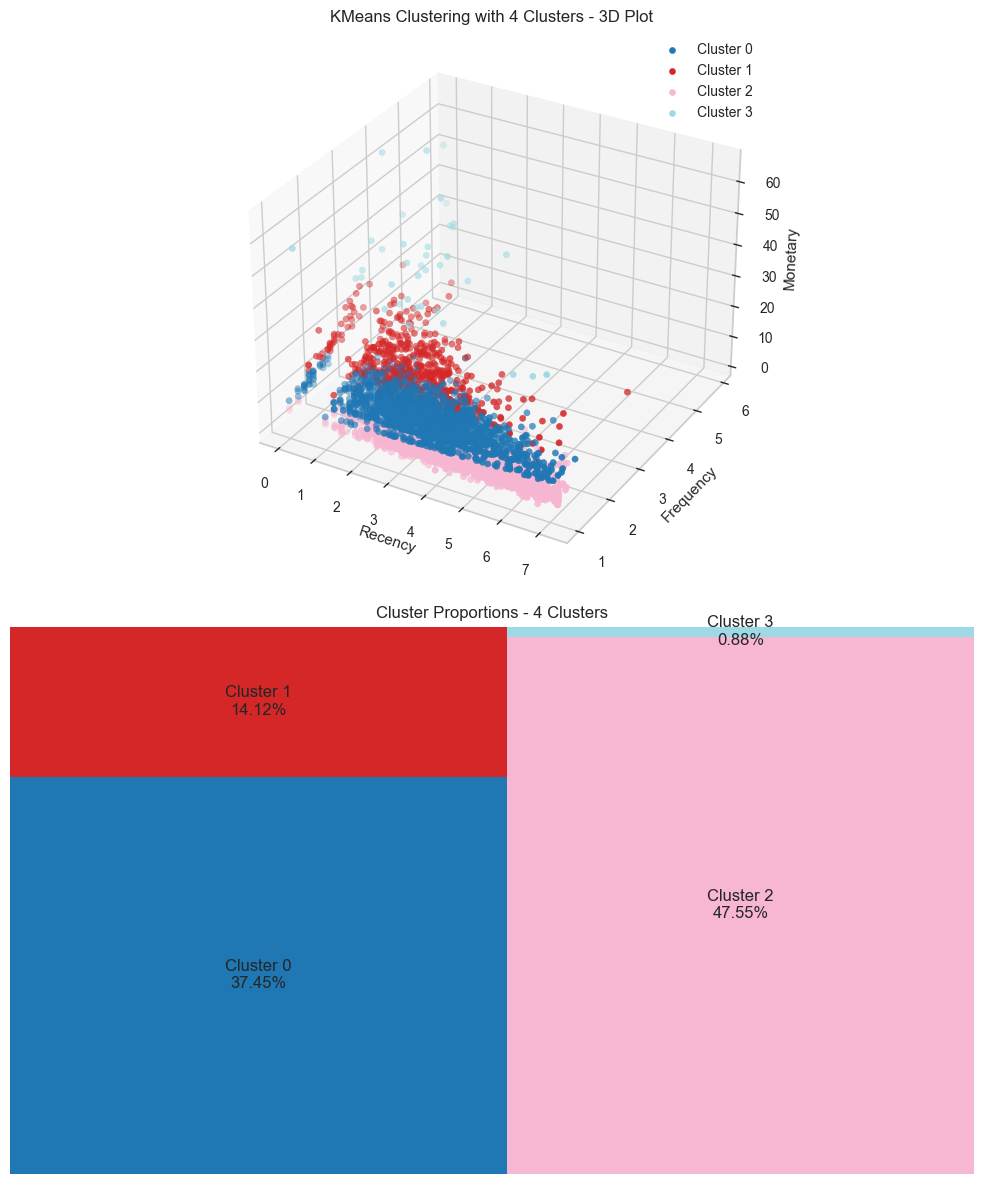

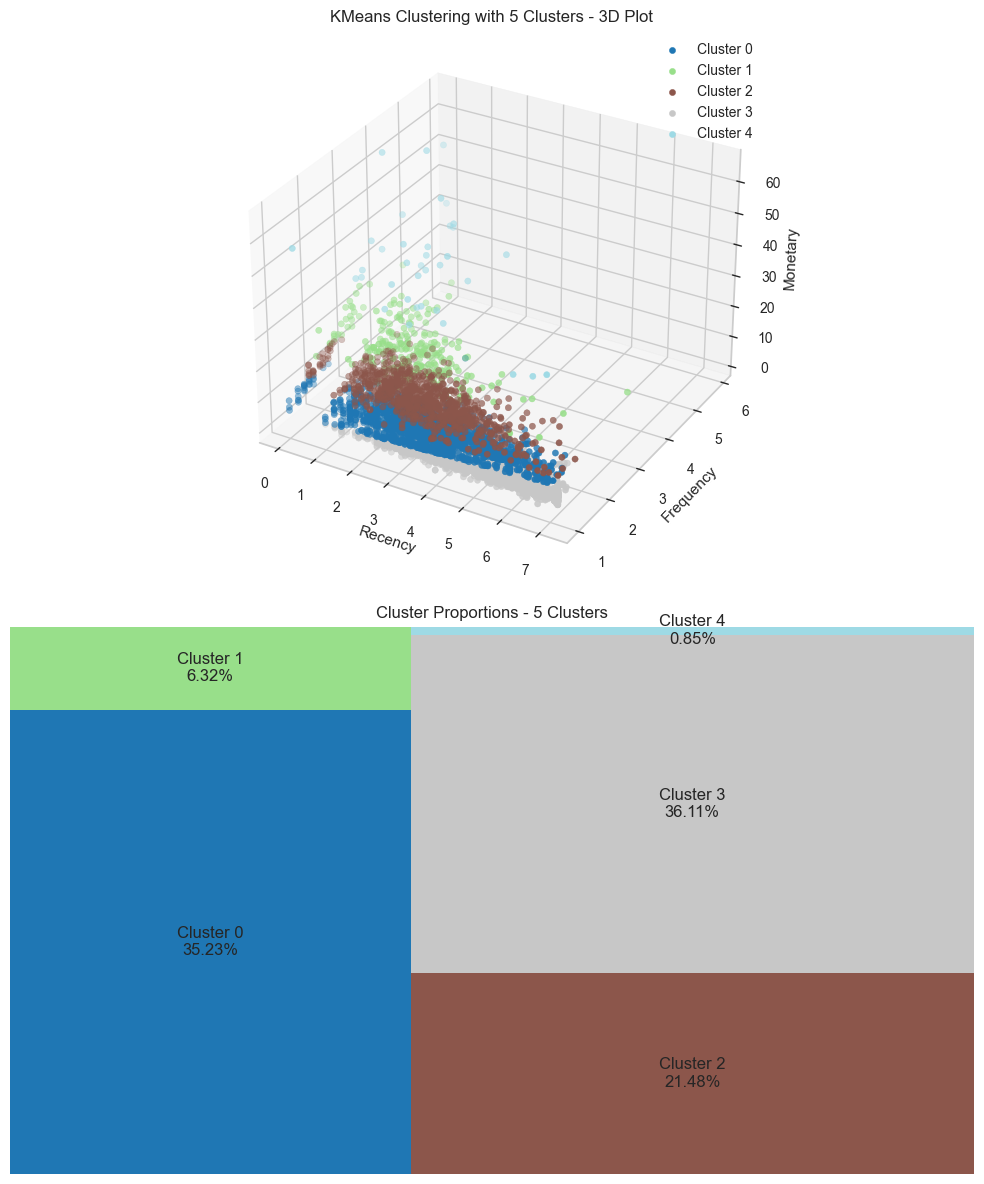

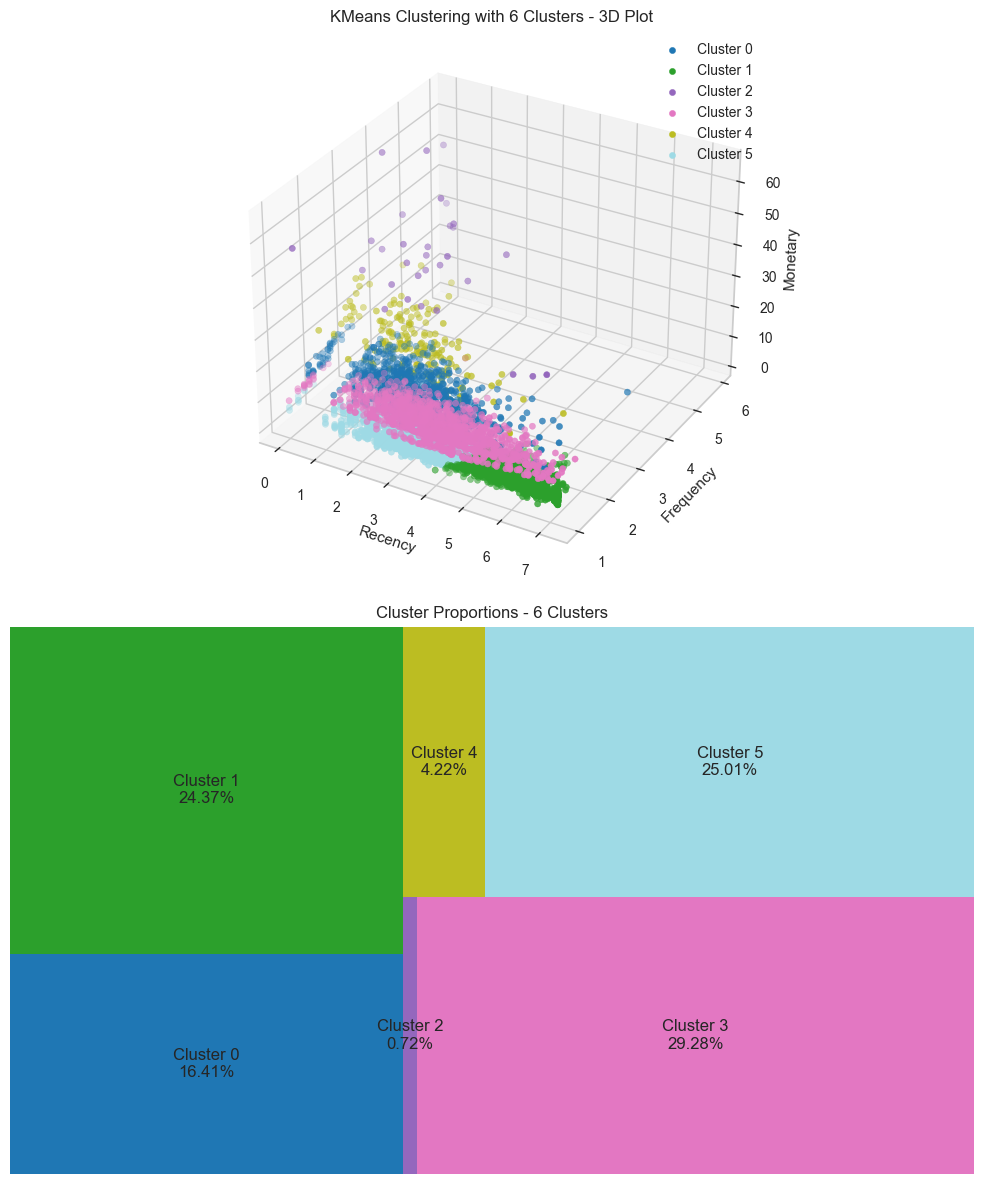

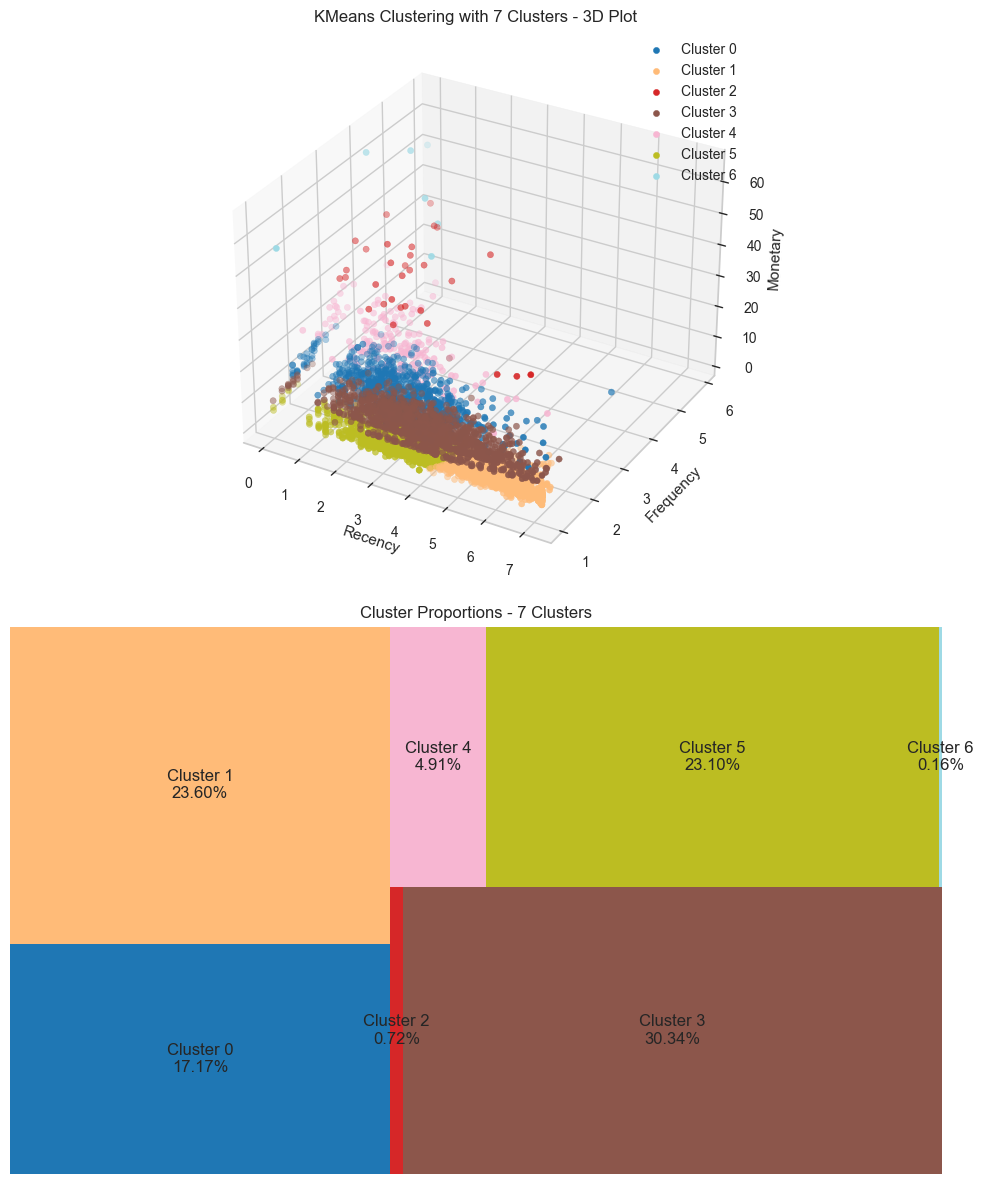

In [67]:
# Loop through different numbers of clusters
for num_clusters in range(3, 8):  
    # Train the K-means model
    kmeans = KMeans(k=num_clusters, seed=42)
    model = kmeans.fit(rfm_spark.select('features'))


    clustered_df = model.transform(rfm_spark)

    # Extract features for plotting
    cluster_assignments = clustered_df.select('prediction').rdd.map(lambda row: row[0]).collect()
    features = clustered_df.select('features').rdd.map(lambda row: row[0]).collect()

    # Calculate cluster proportions
    cluster_counts = clustered_df.groupBy('prediction').count().orderBy('prediction').rdd.map(lambda row: row['count']).collect()
    
    rdd = spark.sparkContext.parallelize(cluster_counts)
    total_count = rdd.reduce(lambda x, y: x + y)

    cluster_percentages = [count / total_count * 100 for count in cluster_counts]
    
    # Create a figure for the plots
    plt.figure(figsize=(10, 12))

    # Plot the 3D scatter plot
    ax1 = plt.subplot(211, projection='3d')
    colors = plt.cm.tab20(np.linspace(0, 1, num_clusters))  # Get colors from a colormap
    for cluster_id in range(num_clusters):
        cluster_points = [features[i] for i in range(len(cluster_assignments)) if cluster_assignments[i] == cluster_id]
        ax1.scatter([p[0] for p in cluster_points], [p[1] for p in cluster_points], [p[2] for p in cluster_points],
                   c=colors[cluster_id], marker='o', label=f'Cluster {cluster_id}')

    ax1.set_xlabel('Recency')
    ax1.set_ylabel('Frequency')
    ax1.set_zlabel('Monetary')
    ax1.legend()
    ax1.set_title(f'KMeans Clustering with {num_clusters} Clusters - 3D Plot')

    # Plot the Squarify plot for cluster proportions
    ax2 = plt.subplot(212)
    cluster_counts = clustered_df.groupBy('prediction').count().orderBy('prediction').rdd.map(lambda row: row['count']).collect()
    squarify.plot(sizes=cluster_percentages, label=[f'Cluster {i}\n{percentage:.2f}%' for i, percentage in enumerate(cluster_percentages)], color=colors)
    ax2.set_title(f'Cluster Proportions - {num_clusters} Clusters')
    plt.axis('off')
    
    plt.savefig(f'./plots/Spark KMeans Clustering with {num_clusters} Clusters - 3D Plot.png')
    
    plt.tight_layout()
    plt.show()

Nhận xét: Với khoảng cluster từ 3 đến 7, có thể thấy được biểu đồ  7 cluster phân hóa dữ liệu data một cách rõ rệt nhất. 
- Trong đó nhóm cluster 0, 2 và 4 nằm trong số những cluster tiềm năng. Các doanh nghiệp nên tập trung vào bộ nhóm cluster này để thu hút và giữ khách hàng
- Cluster 6 là nhóm có số lượng thấp nhất, chỉ chiếm chưa được 1% nhưng lại là cluster doanh nghiệp nên target nhiều nhất.

In [68]:
spark.stop()

# Tóm lại: Chọn FRM để phân loại 

Lí do:
- Vì bản chất đây là phương pháp tối ưu để nhóm các khách hàng theo 3 metrics riêng biệt
- Có thể customize số cụm theo ý thích để phân loại ra chính xác khách hàng thuộc nhóm nào, từ đó đưa ra chiến lượt phù hợp cho doanh nghiệp để thu hút khách hàng
- Vì filter nhóm khách hàng theo điều kiện, nên các cluster gần nhưng không bị trùng lặp hay chồng lắp lẫn nhau


In [69]:
rfm

Recency  Frequency  Monetary Recency_Score Frequency_Score  \
CustomerID                                                               
12346           325          1  77183.60             1               1   
12347             1          7   4310.00             5               5   
12348            74          4   1437.24             2               4   
12349            18          1   1457.55             4               1   
12350           309          1    294.40             1               1   
...             ...        ...       ...           ...             ...   
18280           277          1    180.60             1               2   
18281           180          1     80.82             1               2   
18282             7          2    178.05             5               3   
18283             3         16   2039.58             5               5   
18287            42          3   1837.28             3               4   

           Monetary_Score RFM_Score                   Segment  
CustomerID                                                     
12346                   5       115    Inactive - Hibernating  
12347                   5       555        Active - Champions  
12348                   4       244        Inactive - At Risk  
12349                   4       414        Active - Promising  
12350                   2       112    Inactive - Hibernating  
...                   ...       ...                       ...  
18280                   1       121    Inactive - Hibernating  
18281                   1       121    Inactive - Hibernating  
18282                   1       531        Active - Promising  
18283                   5       555        Active - Champions  
18287                   4       344  Active - Loyal Customers  

[4334 rows x 8 columns]

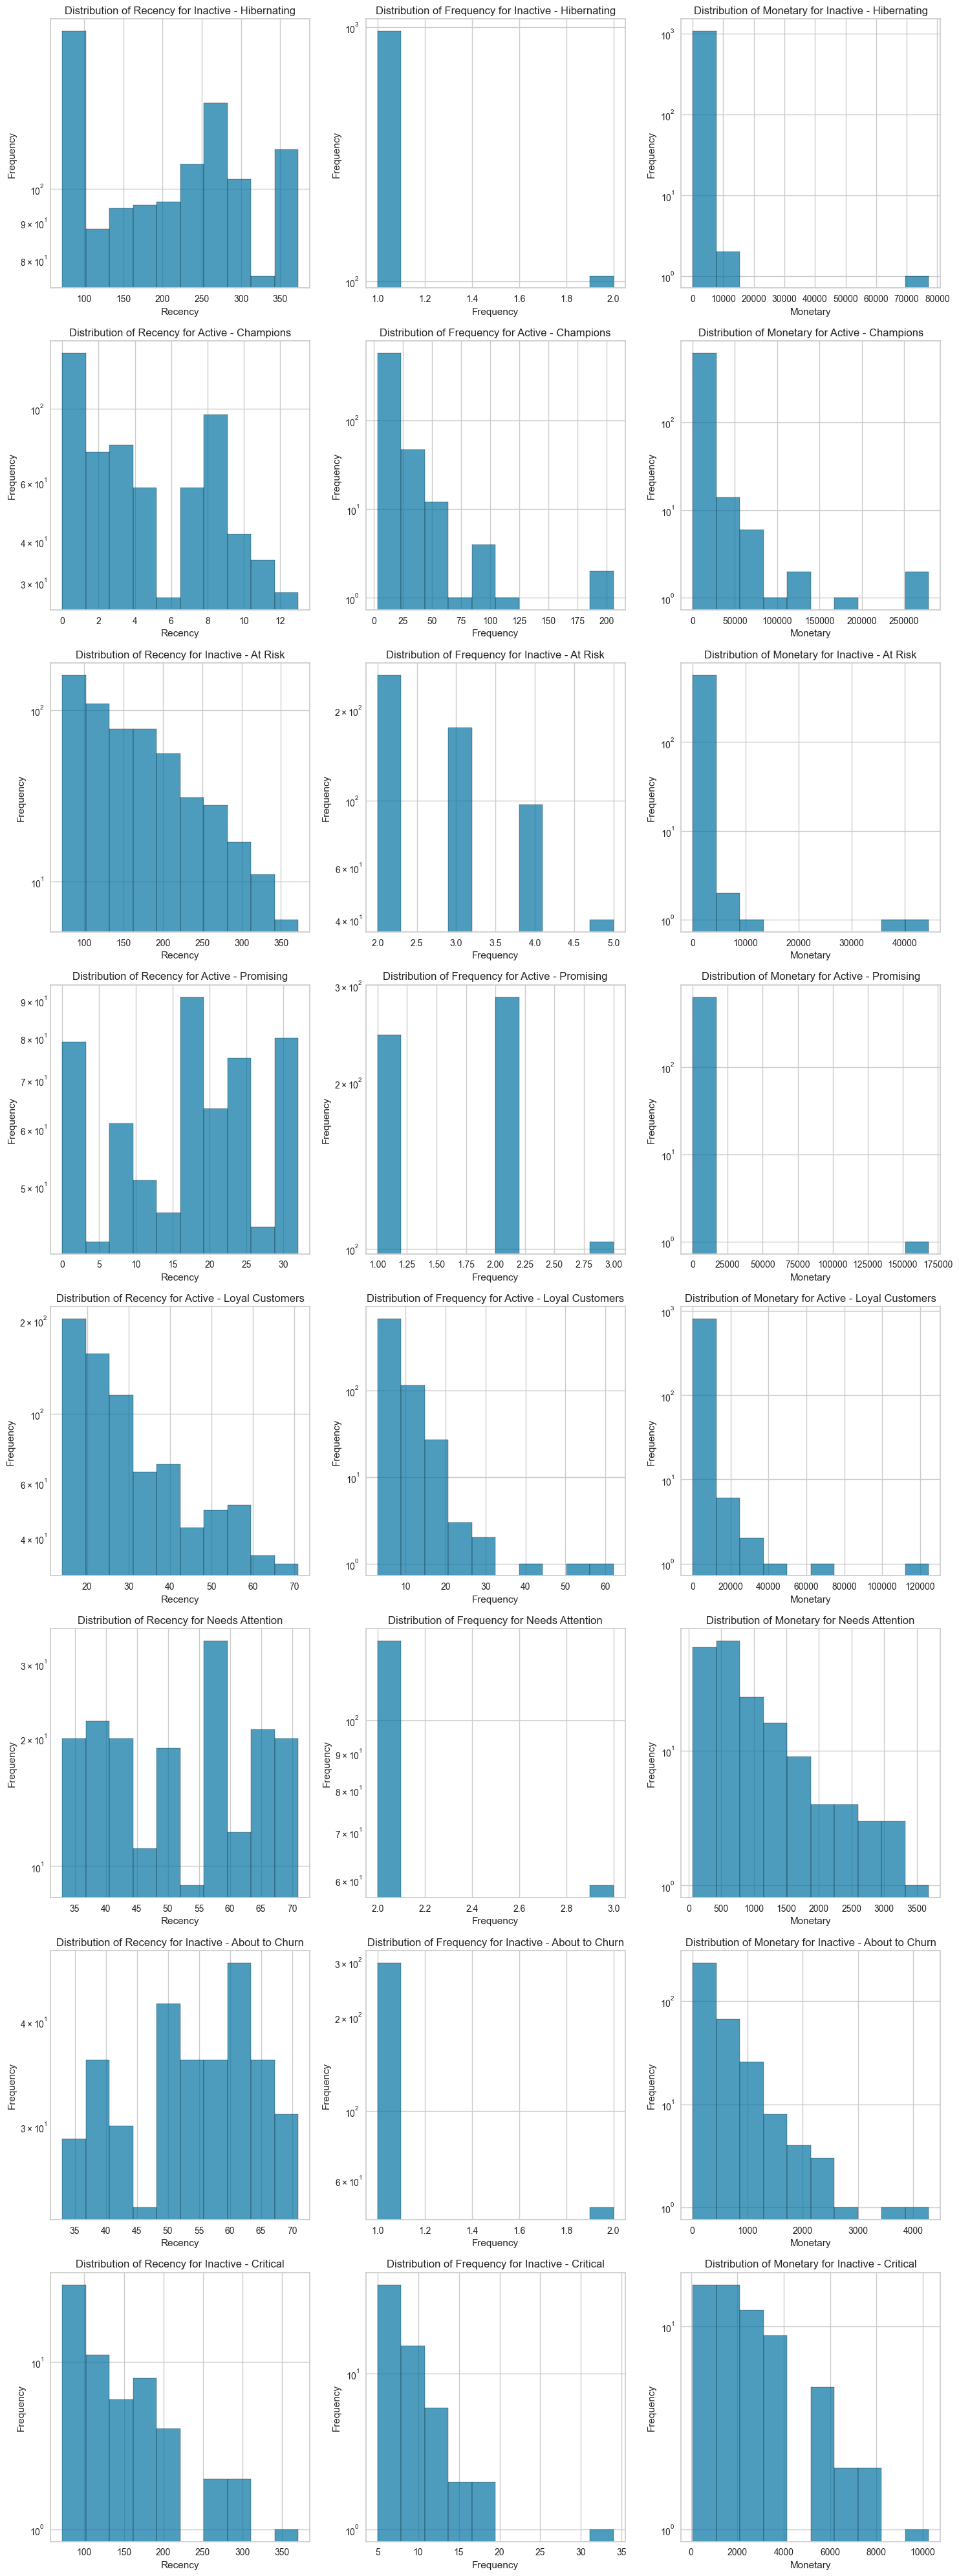

In [70]:
# Biểu đồ phân bố các metrics cho từng cluster
variables = ['Recency', 'Frequency', 'Monetary']
segments = rfm['Segment'].unique()

# Plotting histograms for each variable based on segments
fig, axs = plt.subplots(nrows=len(segments), ncols=len(variables), figsize=(15, 40))

for i, segment in enumerate(segments):
    segment_data = rfm[rfm['Segment'] == segment]
    for j, var in enumerate(variables):
        ax = axs[i, j]
        ax.hist(segment_data[var], bins=10, alpha=0.7,edgecolor='black')
        ax.set_xlabel(var)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Distribution of {var} for {segment}')
        ax.set_yscale('log')

plt.savefig(f'./plots/Distribution of metrics for each of segment')

plt.tight_layout()
plt.show()

In [73]:
# Xây dựng hàm để tương tác với khách hàng
from wordcloud import WordCloud


def invoiceDate_series(customer_id):
    customer_data = data[data['CustomerID'] == customer_id]
    customer_data['InvoiceDate'] = pd.to_datetime(customer_data['InvoiceDate'])

    # Group by day and sum the Quantity
    time_series_data = customer_data.groupby(customer_data['InvoiceDate'].dt.date)['Quantity'].sum().reset_index()

    # Plotting the time series
    plt.figure(figsize=(10, 6))
    plt.plot(time_series_data['InvoiceDate'], time_series_data['Quantity'], marker='o')
    
    for i, (day, quantity) in enumerate(zip(time_series_data['InvoiceDate'], time_series_data['Quantity'])):
        plt.text(day, quantity, f'{day.strftime("%Y-%m-%d")}\n{quantity} items', ha='center', va='bottom')
    
    
    plt.xlabel('Day')
    plt.ylabel('Total Quantity')
    plt.title(f'Time Series for CustomerID {customer_id} based on Total Quantity per Day')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
def info_customer_using_invoiceid(customer_id):
    
    segment = rfm.loc[customer_id, 'Segment']
    recency = rfm.loc[customer_id, 'Recency']
    frequency = rfm.loc[customer_id, 'Frequency']
    monetary = rfm.loc[customer_id, 'Monetary']
    country = data[data['CustomerID'] == customer_id]['Country'].values[0]
    invoiceDate = data[data['CustomerID'] == customer_id]['InvoiceDate']

    print('Customer ID:', customer_id)
    print('Recency:', recency)
    print('Frequency:', frequency)
    print('Monetary:', monetary)
    print('Segment:', segment)
    print('Country:', country)

    invoiceDate_series(customer_id)
    # Generate word cloud
    text = ' '.join(data[data['CustomerID'] == customer_id]['Description'])
    wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=50).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('What did the customer buy?', fontsize=25)
    plt.axis('off')
    plt.show()

    
    


Customer ID: 12680
Recency: 0
Frequency: 4
Monetary: 790.8100000000001
Segment: Active - Champions
Country: France


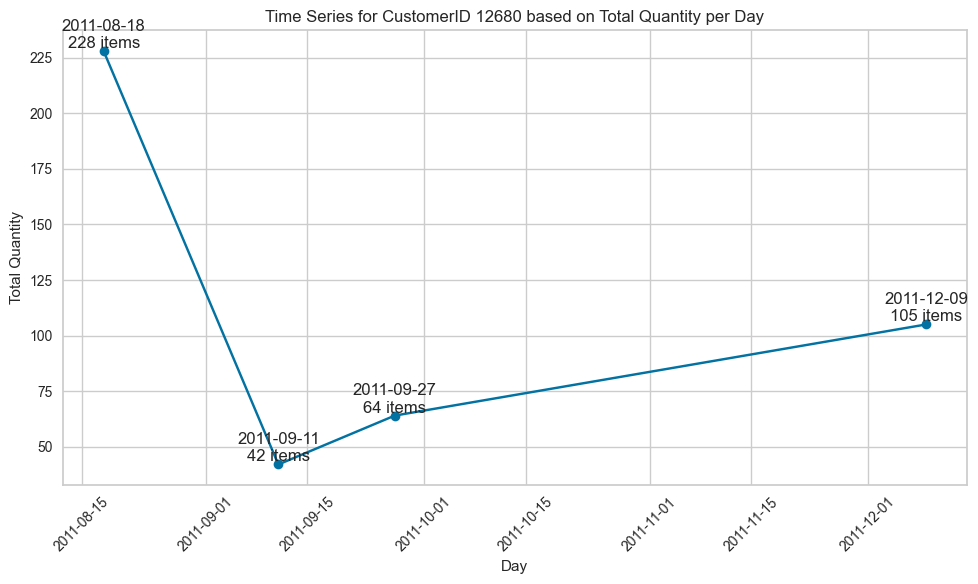

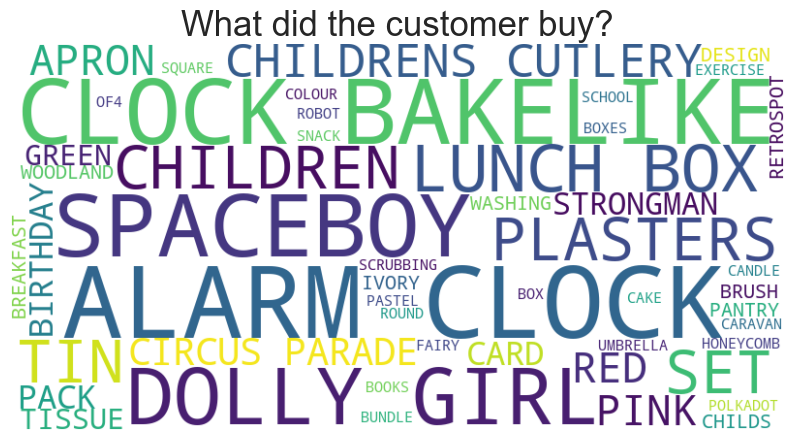

In [74]:
# Thông tin cụ thể của khách hàng
info_customer_using_invoiceid(12680)